# E-Waste Classification using EfficientNetV2B0

##  Problem Statement and Description

E-waste (electronic waste) is rapidly becoming a serious environmental and health issue around the world. Proper sorting and categorization of e-waste is essential for efficient recycling and disposal, but manual classification is error-prone and labor-intensive.

This project aims to build an automated e-waste classification system using artificial intelligence and machine learning. By training a deep learning model on images of different types of e-waste, we can identify and categorize them accurately.

###  Goal:
Use image classification with EfficientNetV2B0 to classify e-waste into 10 distinct categories to support better sorting and recycling automation.

---
</div>


##  Dataset Overview

###  Dataset Name: E-Waste Image Dataset  
###  Source:  https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset 

Each directory contains 10 subfolders, each representing one class of e-waste:

- PCB (Printed Circuit Board)
- Player
- Battery
- Microwave
- Mobile
- Mouse
- Printer
- Television
- Washing Machine
- Keyboard

</div>




##  What is Transfer Learning?

Transfer Learning: Transfer Learning is a machine learning technique where a pre-trained model developed for a specific task is reused as the starting point for a model on a different but related task. It also allows us to build accurate models in a time-saving way by starting from patterns learned when solving a different problem. This approach is beneficial when there is limited data for the new task, as the pre-trained model already has learned features that can be adapted. Transfer learning can significantly improve models' performance and efficiency in domains like computer vision and natural language processing.

###  Benefits
-  **Reduces training time** — you don't start from scratch.
-  **Leverages learned features** from large datasets (like ImageNet).
-  **Improves performance**, especially with limited data.

---

##  How Does It Work?

1.  Load a pretrained model (e.g., ResNet, EfficientNet).
2.  **Freeze** the pretrained layers (optional).
3.  Add new layers for your custom task.
4.  Train on your new dataset (can also fine-tune).

---

#  EfficientNetV2B0: Transfer Learning Backbone

##  Overview

EfficientNetV2 is an optimized family of models introduced by Google for efficient training and inference.

###  Key Features:
-  Fused MBConv blocks — improve training speed and GPU efficiency.
-  Progressive learning — gradually increases input size during training.
-  Better accuracy with fewer parameters and FLOPs.

---

##  Why Use EfficientNetV2B0?
 -  Lightweight - Small model size, ideal for mobile & edge devices 
 -  Fast - Quick training and inference           
 -  Pretrained on ImageNet - Excellent feature extraction baseline             
 -  High Accuracy - Competitively performs even in low-resource setups



In [2]:
# Install TensorFlow package
!pip install tensorflow

###  Core Libraries
- `tensorflow`: For deep learning model building and training.
- `numpy`: For numerical operations and array manipulation.
- `matplotlib.pyplot`: For plotting training curves and results.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import gradio as gr
from PIL import Image

###  Format: Folder-based image classification dataset  
- `Train/`: Images used for training the model  
- `Test/`: Images used for model evaluation  
- `Validation/`: Images used to fine-tune and validate the model  


In [ ]:
# Dataset paths
trainpath = r'modified-dataset/train'
validpath = r'modified-dataset/val'
testpath = r'modified-dataset/test'


### Load image dataset using tools like `image_dataset_from_directory`.
### Split data into training, validation, and testing sets.

`tf.keras.utils.image_dataset_from_directory(...)`  
Used to load images from a directory where each subfolder represents a class.

---

In [7]:
datatrain = tf.keras.utils.image_dataset_from_directory(trainpath, shuffle=True, image_size=(128,128), batch_size=32)
datatest = tf.keras.utils.image_dataset_from_directory(testpath, shuffle=False, image_size=(128,128), batch_size=32)
datavalid = tf.keras.utils.image_dataset_from_directory(validpath, shuffle=True, image_size=(128,128), batch_size=32)
class_names = datatrain.class_names
print("Classes:", class_names)

Found 2400 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


### Visualize sample images from each class.

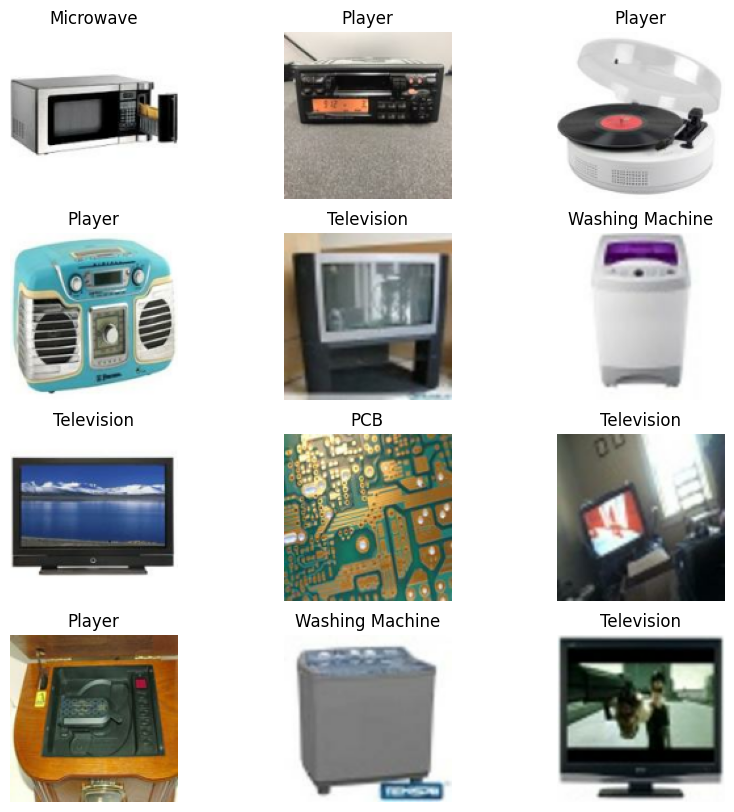

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in datatrain.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

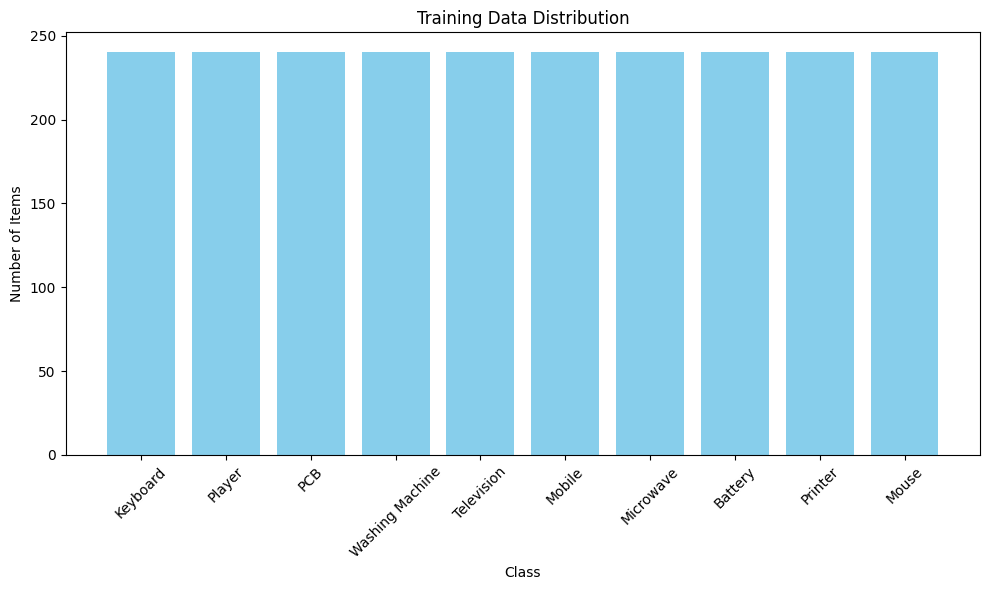

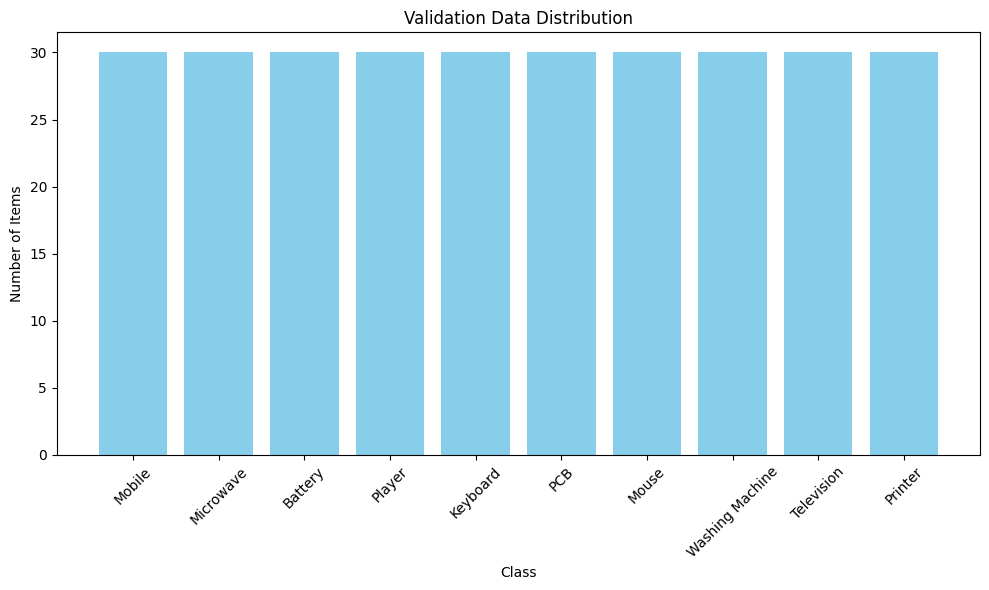

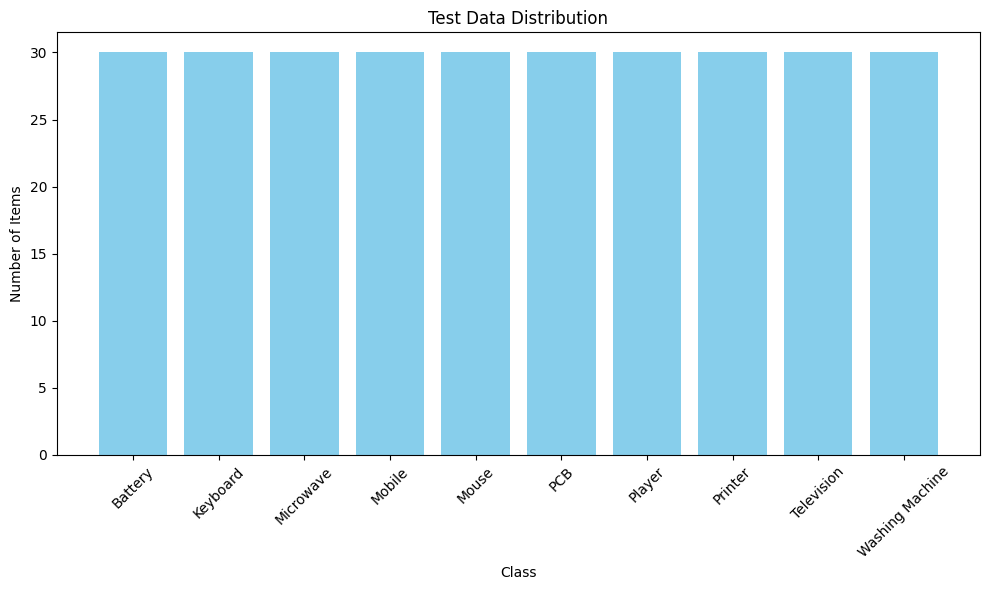

In [ ]:
def plot_class_distribution(dataset, title="Class Distribution"):
    class_counts = {}
    for images, labels in dataset:
        for label in labels.numpy():
            class_name = dataset.class_names[label]
            class_counts[class_name] = class_counts.get(class_name, 0) + 1
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("Number of Items")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")


## Data Preprocessing / Preparation
- Resize and rescale images.
- Apply data augmentation (e.g., `RandomFlip`, `RandomRotation`, `RandomZoom`) to improve generalization.
- Normalize images (using `preprocess_input` if using pre-trained models like EfficientNet).


## Model Selection
- Choose a base model: Custom CNN or Transfer Learning (e.g., `EfficientNetV2B0`).
- Decide whether to use pre-trained weights (e.g., ImageNet).
- Define whether layers should be trainable or frozen during initial training.


## Model Training
- Build the model architecture using `Sequential` or Functional API.
- Compile the model with loss function ( `sparse_categorical_crossentropy`), optimizer (e.g., `Adam`), and evaluation metrics (`accuracy`).

## Model Tuning and Optimization
- Tune hyperparameters: learning rate, batch size, number of layers, dropout rate.
- Use callbacks: `EarlyStopping`, 
- Optionally perform fine-tuning on pre-trained models by unfreezing some layers.

### Model Architecture and Layer Utilities

- **Sequential**: A simple way to build models by stacking layers one after the other in a linear fashion.

- **RandomFlip**: A data augmentation layer that flips input images horizontally or vertically at random, helping the model generalize better.

- **RandomRotation**: Randomly rotates images by a specified angle range during training to make the model invariant to orientation.

- **RandomZoom**: Applies random zoom-in or zoom-out to training images, helping the model recognize objects at various scales.

- **Dropout**: A regularization method that randomly "drops" (sets to zero) a fraction of input units during training to prevent overfitting.

- **GlobalAveragePooling2D**: Reduces each feature map to a single number by taking the average, reducing model parameters and helping prevent overfitting.

- **Dense**: A fully connected neural network layer used to learn complex features and typically found at the end of the model for classification.

- **Input**: Specifies the input shape and data type for the model; acts as the starting point of the model architecture.

- **EfficientNetV2B0**: A pre-trained convolutional neural network from the EfficientNetV2 family, known for being lightweight and high-performing, commonly used for transfer learning.





In [13]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])
base_model = EfficientNetV2B0(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['Accuracy'])

###  Callbacks
- `EarlyStopping`: To stop training when validation performance stops improving.

In [11]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(datatrain, validation_data=datavalid, epochs=15, batch_size=100, callbacks=[early])

Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 69s 581ms/step - Accuracy: 0.2803 - loss: 2.0938 - val_Accuracy: 0.8100 - val_loss: 1.1112
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 557ms/step - Accuracy: 0.7805 - loss: 1.0089 - val_Accuracy: 0.9233 - val_loss: 0.4988
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 36s 477ms/step - Accuracy: 0.8616 - loss: 0.5321 - val_Accuracy: 0.9333 - val_loss: 0.2925
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 429ms/step - Accuracy: 0.8987 - loss: 0.3354 - val_Accuracy: 0.9500 - val_loss: 0.2353
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 431ms/step - Accuracy: 0.9274 - loss: 0.2763 - val_Accuracy: 0.9500 - val_loss: 0.2002
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 426ms/step - Accuracy: 0.9486 - loss: 0.2132 - val_Accuracy: 0.9433 - val_loss: 0.1742
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 432ms/step - Accuracy: 0.9508 - loss: 0.1811 - val_Accuracy: 0.9500 - val_loss: 0.1693
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 424ms/step - Accuracy: 0.9609 - loss: 0.1470 - val_Accu

### Train the model using `.fit()` with appropriate `epochs`, `batch_size`, and callbacks like `EarlyStopping`.

# Model Performance Visualization: Accuracy & Loss Trends

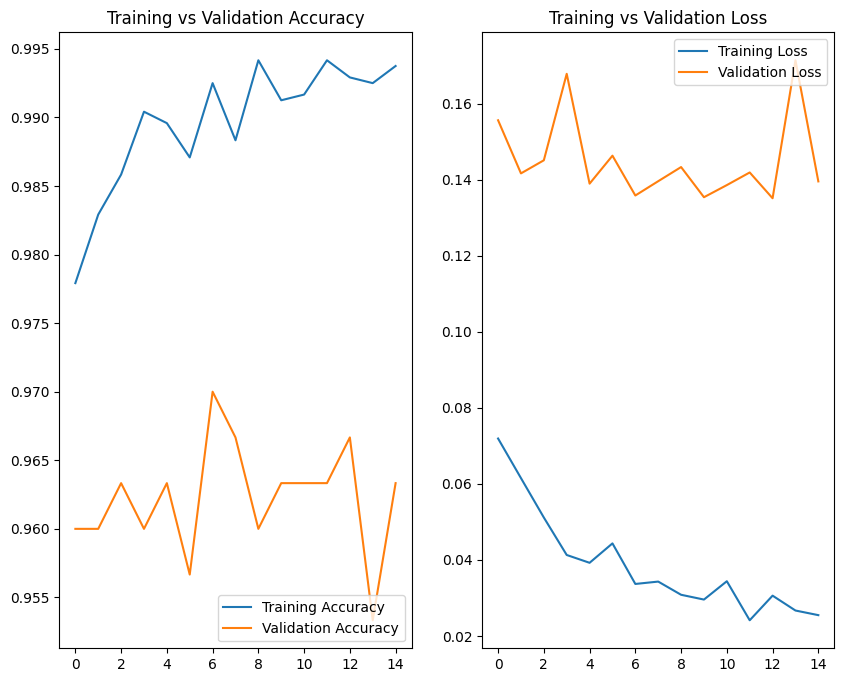

In [20]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.show()

## 6.  Model Evaluation
- Plot training and validation accuracy/loss curves.
- Evaluate model performance on validation or test set.
- Use metrics like:
  - **Confusion Matrix**
  - **Classification Report** (Precision, Recall, F1-score)
  - `confusion_matrix`, `classification_report`: To evaluate the model's classification performance.




In [19]:
loss, accuracy = model.evaluate(datatest)
print(f'Test accuracy: {accuracy:.4f}, Test loss: {loss:.4f}')
y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)
y_pred_probs = model.predict(datatest)
y_pred = np.argmax(y_pred_probs, axis=1)
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - Accuracy: 0.9586 - loss: 0.1253
Test accuracy: 0.9667, Test loss: 0.1148
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step
[[28  0  0  0  0  2  0  0  0  0]
 [ 1 28  0  0  0  0  1  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 29  1  0  0  0]
 [ 0  0  1  0  1  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  1  1  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       1.00      0.93      0.97        30
           2       0.94      1.00      0.97        30
           3       0.97      1.00      0.98        30
           4       0.97      0.97      0.97        30
           5       0.94      0.97      0.95        30
           6       0.93      0.93      0.93        30
           7       0.97      1.00      0.98        30
           8       1.00  

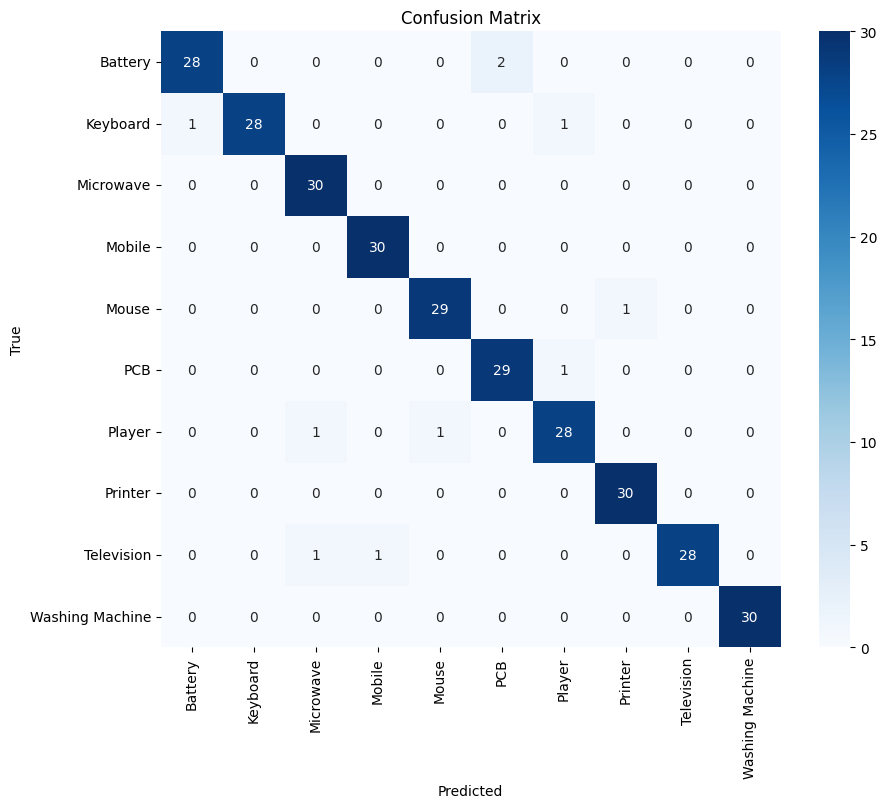

In [21]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 7.  Final Testing and Save the Model
- Evaluate the final model on the unseen **test dataset**.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


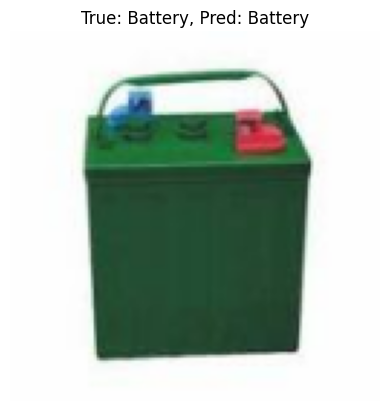

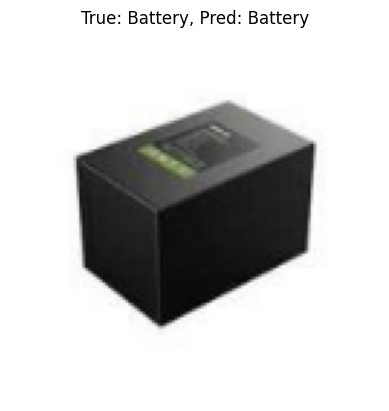

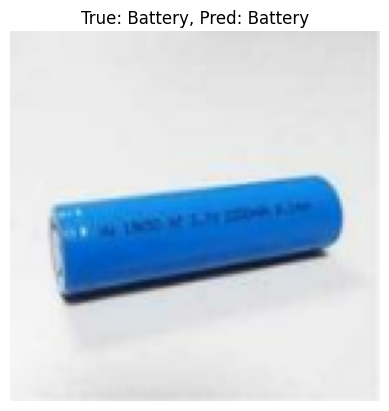

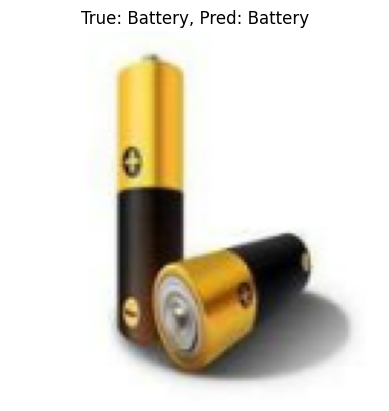

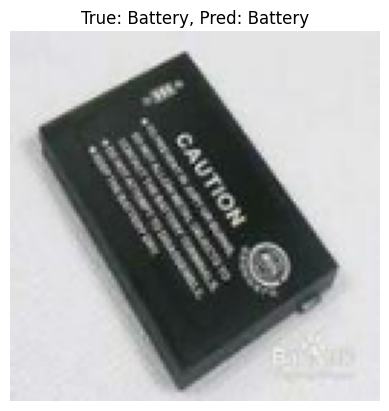

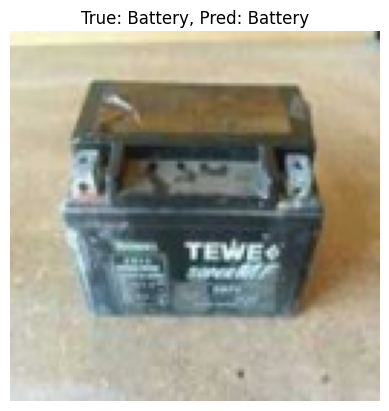

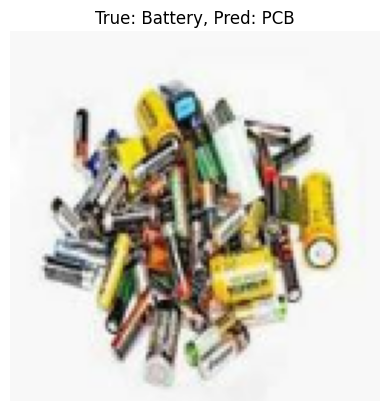

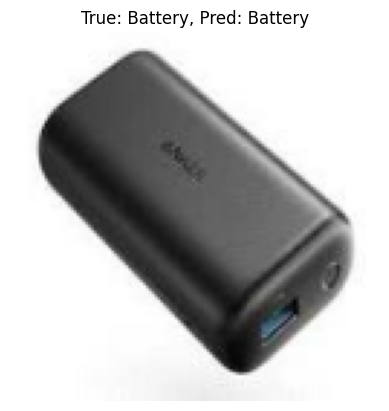

In [22]:
for images, labels in datatest.take(1):
    predictions = model.predict(images)
    pred_labels = tf.argmax(predictions, axis=1)
    for i in range(8):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[pred_labels[i]]}")
        plt.axis("off")
        plt.show()

**Save the trained model using `model.save()` or `save_model()` for future inference.**

In [23]:
model.save('Efficient_classify.keras')
model = tf.keras.models.load_model('Efficient_classify.keras')


## 8.  Model Deployment
- Create a web interface using **Gradio**.
- Load the saved model and preprocess input images before prediction.

In [24]:
!pip install gradio

### 🌐 Gradio Interface and Preprocessing
- `gr`: To build a web interface for the model.
- `PIL.Image`: For handling image input in Gradio.
- `preprocess_input`: Preprocessing method for EfficientNet.
- `load_model`: For loading a saved model for inference.


In [25]:
def classify_image(img):
    img = img.resize((128, 128))
    img_array = np.array(img, dtype=np.float32)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence = prediction[0][index]
    return f"Predicted: {class_name} (Confidence: {confidence:.2f})"
iface = gr.Interface(fn=classify_image, inputs=gr.Image(type="pil"), outputs="text")
iface.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
